In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("chicago_grocery_stores_2013.csv", index_col=0)

In [4]:
data

,LATITUDE,LONGITUDE
STORE NAME,,
200 LIQUORS,41.809424,-87.620952
3600 COMMISSARY,41.948684,-87.643650
4343 PETES FRESH MARKET,41.813914,-87.723665
4700 PETE'S FRESH MARKET,41.808047,-87.704119
5659 W. DIVERSEY,41.931135,-87.768612
...,...,...
WORLD FRESH MARKET,41.997818,-87.691252
W & R FOOD & LIQUOR INC,41.751419,-87.582206
ZEE DOLLAR AND FOOD,41.758293,-87.615354


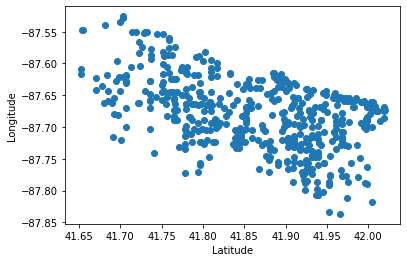

In [5]:
plt.scatter(data['LATITUDE'], data['LONGITUDE'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [6]:
duplicate = data.copy()
duplicate

,LATITUDE,LONGITUDE
STORE NAME,,
200 LIQUORS,41.809424,-87.620952
3600 COMMISSARY,41.948684,-87.643650
4343 PETES FRESH MARKET,41.813914,-87.723665
4700 PETE'S FRESH MARKET,41.808047,-87.704119
5659 W. DIVERSEY,41.931135,-87.768612
...,...,...
WORLD FRESH MARKET,41.997818,-87.691252
W & R FOOD & LIQUOR INC,41.751419,-87.582206
ZEE DOLLAR AND FOOD,41.758293,-87.615354


In [7]:
from sklearn import preprocessing
scaled_data = preprocessing.scale(duplicate)
scaled_data

array([[-0.61252235,  1.08558737],
       [ 0.91081014,  0.68084365],
       [-0.56340262, -0.74596481],
       ...,
       [-1.17182855,  1.18540382],
       [-0.61362738,  1.22139876],
       [-1.41834867,  0.42801711]])

In [8]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(i, random_state = 42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
wcss

[1012.0000000000001,
 488.40659181273105,
 338.26801988896466,
 231.83829497718773,
 189.5135893657225,
 153.74241084180778,
 128.50277706709517,
 111.59992792220055,
 98.4301860235791,
 88.59059039488875,
 79.76289145265085,
 72.6511711556895,
 67.33323371702717,
 62.32557411265329,
 56.998968517761824,
 52.61646387354433,
 49.23893725501591,
 46.17684860123269,
 42.40027334281616,
 41.18092602110747,
 38.48946231972364,
 36.629729441096906,
 34.774037631692224,
 33.65317412104047,
 31.722497402319803,
 30.518368019738357,
 29.011633012339686,
 27.56210743128611,
 27.0400050465278]

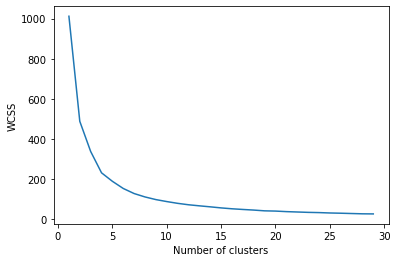

In [9]:
plt.plot(range(1, 30), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [10]:
kmeans_new = KMeans(4, random_state = 42)
kmeans_new.fit(scaled_data)
cluster = duplicate.copy()
cluster['prediction'] = kmeans_new.fit_predict(duplicate)
cluster

,LATITUDE,LONGITUDE,prediction
STORE NAME,,,
200 LIQUORS,41.809424,-87.620952,2
3600 COMMISSARY,41.948684,-87.643650,3
4343 PETES FRESH MARKET,41.813914,-87.723665,2
4700 PETE'S FRESH MARKET,41.808047,-87.704119,2
5659 W. DIVERSEY,41.931135,-87.768612,0
...,...,...,...
WORLD FRESH MARKET,41.997818,-87.691252,3
W & R FOOD & LIQUOR INC,41.751419,-87.582206,1
ZEE DOLLAR AND FOOD,41.758293,-87.615354,1


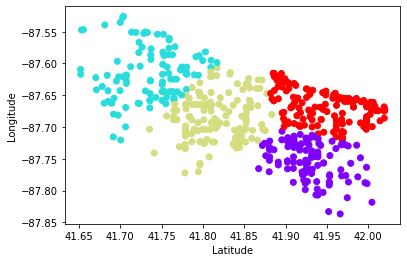

In [11]:
plt.scatter(cluster['LATITUDE'], cluster['LONGITUDE'], c = cluster['prediction'], cmap = 'rainbow')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [12]:
business_density = {0: 0, 1: 0, 2: 0, 3: 0}
cluster_ids = cluster['prediction']

In [13]:
for i in range(0, len(cluster_ids)):
    business_density[cluster_ids[i]] += 1
business_density

{0: 115, 1: 102, 2: 140, 3: 149}

In [32]:
import geopandas as gpd

In [16]:
crs = {'init': 'epsg:4326'}
data.head()

,LATITUDE,LONGITUDE
STORE NAME,,
200 LIQUORS,41.809424,-87.620952
3600 COMMISSARY,41.948684,-87.643650
4343 PETES FRESH MARKET,41.813914,-87.723665
4700 PETE'S FRESH MARKET,41.808047,-87.704119
5659 W. DIVERSEY,41.931135,-87.768612


In [17]:
from shapely.geometry import Point, Polygon

In [18]:
geometry = [Point(xy) for xy in zip(data['LONGITUDE'], data['LATITUDE'])]
geometry

In [21]:
geo_data = gpd.GeoDataFrame(data, crs = crs, geometry = geometry)
geo_data['prediction'] = cluster['prediction']
geo_data.head()

D:\Anaconda\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,LATITUDE,LONGITUDE,geometry,prediction
STORE NAME,,,,
200 LIQUORS,41.809424,-87.620952,POINT (-87.62095 41.80942),2
3600 COMMISSARY,41.948684,-87.643650,POINT (-87.64365 41.94868),3
4343 PETES FRESH MARKET,41.813914,-87.723665,POINT (-87.72366 41.81391),2
4700 PETE'S FRESH MARKET,41.808047,-87.704119,POINT (-87.70412 41.80805),2
5659 W. DIVERSEY,41.931135,-87.768612,POINT (-87.76861 41.93114),0


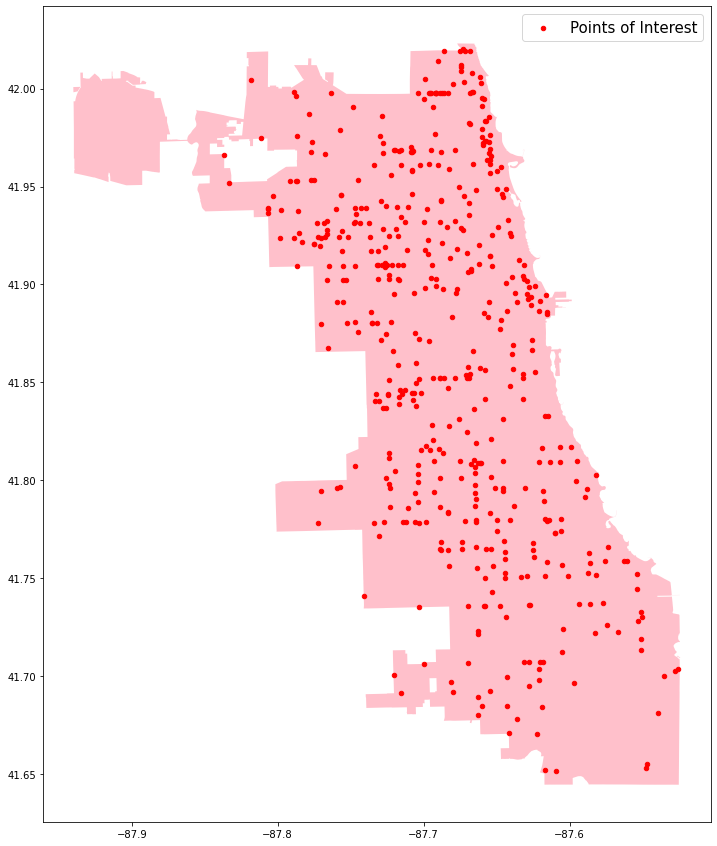

In [30]:
street_map = gpd.read_file("geo_export_55fcb48c-7621-4c8a-999c-9fb3c86e8950.shp")
fig, ax = plt.subplots(figsize = (15, 15))
street_map.plot(ax = ax, color = 'pink')
geo_data.plot(ax = ax, markersize = 20, color = 'red', marker = "o", label = 'Points of Interest')
plt.legend(prop = {'size': 15})

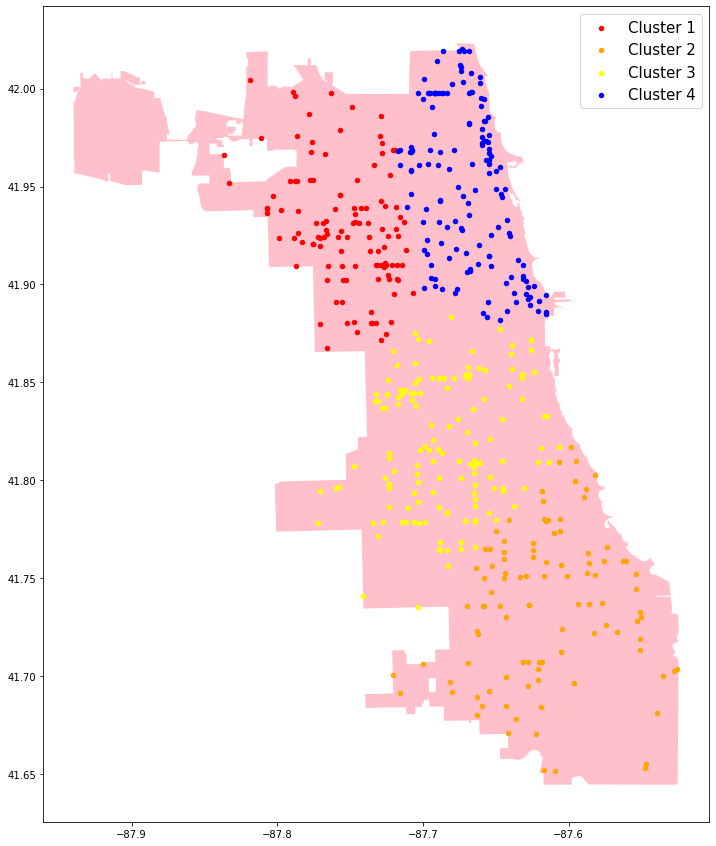

In [31]:
fig, ax = plt.subplots(figsize = (15, 15))
street_map.plot(ax = ax, color = 'pink')
geo_data[geo_data['prediction'] == 0].plot(ax = ax, markersize = 20, color = 'red', marker = "o", label = 'Cluster 1')
geo_data[geo_data['prediction'] == 1].plot(ax = ax, markersize = 20, color = 'orange', marker = "o", label = 'Cluster 2')
geo_data[geo_data['prediction'] == 2].plot(ax = ax, markersize = 20, color = 'yellow', marker = "o", label = 'Cluster 3')
geo_data[geo_data['prediction'] == 3].plot(ax = ax, markersize = 20, color = 'blue', marker = "o", label = 'Cluster 4')
plt.legend(prop = {'size': 15})